# Crowdfunding Platform Management System

**Contributors:** Sweta Behera (055051), Vibhavari Saran (055055)

## 1. Introduction

**Project Overview**

The Crowdfunding Platform Management System is designed to facilitate and streamline the management of crowdfunding campaigns by integrating various functionalities, including campaign creation, contribution tracking, reward management, financial transactions, and donor communication. By utilizing a relational database structure in MySQL, the system ensures efficient data storage, retrieval, and management, enhancing transparency and operational efficiency.

**Purpose of the Report**

This report provides a comprehensive analysis of the Crowdfunding Platform Management Database, detailing its objectives, structure, relationships, and managerial implications. It serves as a reference for database administrators, crowdfunding platform managers, and IT professionals to understand the design and functionality of the system.

## 2. Objectives

The primary objectives of the Crowdfunding Platform Management System are:

* To centralize crowdfunding data and streamline the management of fundraising campaigns.

* To enhance transparency and accountability in financial transactions and contribution tracking.

* To facilitate seamless interaction between campaign organizers and backers.

* To improve financial management by tracking contributions, payments, and disbursements.

* To optimize reward allocation and claims, ensuring contributors receive their benefits efficiently.

* To provide secure access control, ensuring data privacy and integrity for all stakeholders.

* To assist in regulatory compliance by maintaining accurate financial and transactional records.

* To enable seamless integration with external financial services, such as payment gateways and digital wallets.

* To incorporate real-time analytics and reporting, providing campaign organizers with actionable insights for better decision-making.

## 3. Database Description

The Crowdfunding Platform Management Database consists of 8 core relational tables with well-defined relationships to ensure seamless data flow and integrity. The structure follows normalization principles to reduce redundancy, maintain consistency, and improve data retrieval efficiency.

**Entity-Relationship Diagram (ERD) using the crowfeet annotations**

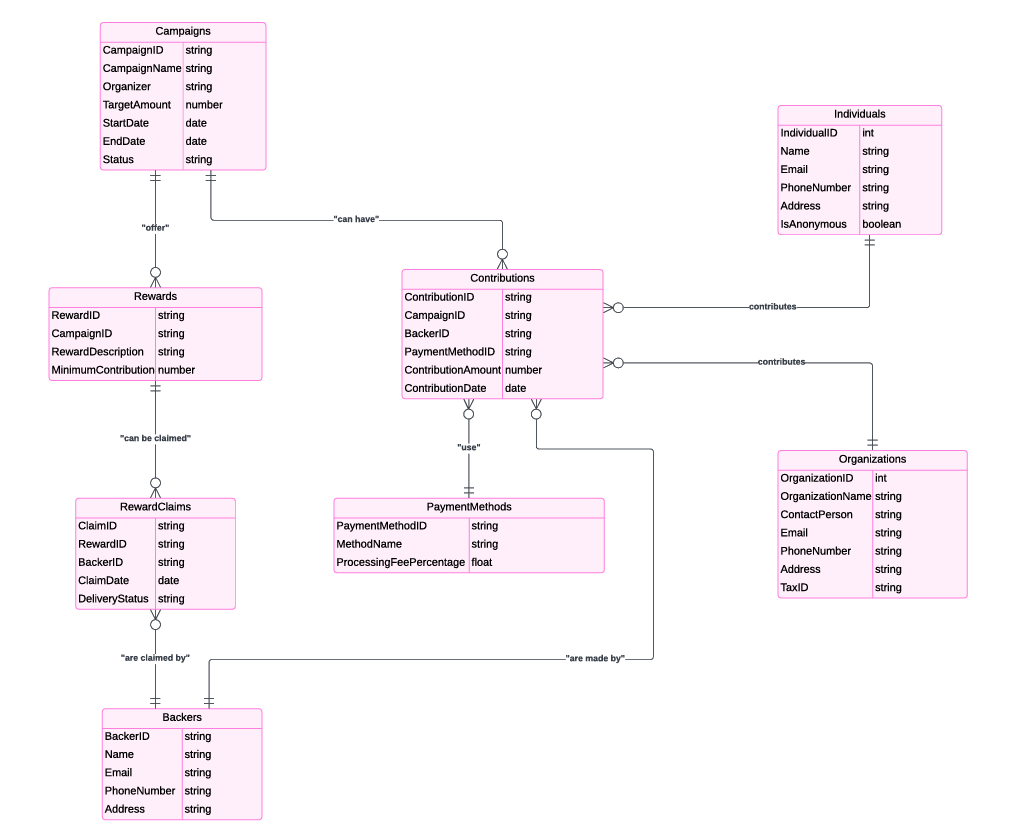

## 4. Key Features and Tables

**Key Features:**

- **Campaign Management:** Stores comprehensive records of campaigns, including goals, organizers, timelines, and progress tracking.

- **Backer and Contribution Management:** Tracks contributors, ensuring transparency, accountability, and seamless processing through multiple payment methods.

- **Reward Allocation and Management:** Automates storage, distribution, and tracking of rewards based on contribution levels.

- **Financial Transactions:** Logs all transactions securely for audit and compliance, including processing fees and financial summaries.

- **User Roles and Security:** Implements role-based access control (RBAC) and authentication to protect financial and contributor data.

- **Scalability:** Designed to accommodate growing campaigns, contributors, and transactions, with support for external integrations.

**Tables:**

- **Campaigns:** Stores details about crowdfunding campaigns, including their name, organizer, target amount, and status.

- **Contributions:** Tracks financial contributions made to campaigns, linking to backers and payment methods.

- **Backers:** Stores details of individuals supporting campaigns, including their personal information.

- **Rewards:** Manages rewards offered to contributors, specifying eligibility based on contribution amounts.

- **RewardClaims:** Tracks which rewards have been claimed by backers and their delivery status.

- **PaymentMethods:** Maintains payment options used for transactions, along with processing fees.

- **Organizations:** Stores data about corporate donors contributing to campaigns.

- **Individuals:** Maintains information about personal contributors, including anonymization preferences.

## 5. Detailed Features of the Tables

**1. Campaigns**

Stores details of crowdfunding campaigns.

* CampaignID (INT, PRIMARY KEY, NOT NULL)

* CampaignName (VARCHAR(100), NOT NULL)

* Organizer (VARCHAR(100), NOT NULL)

* TargetAmount (DECIMAL(10,2), NOT NULL)

* StartDate (DATE, NOT NULL)

* EndDate (DATE, NOT NULL)

* Status (VARCHAR(50), NOT NULL)

**2. Contributions**

Tracks financial contributions made to campaigns.

* ContributionID (INT, PRIMARY KEY, NOT NULL)

* CampaignID (INT, FOREIGN KEY REFERENCES Campaigns(CampaignID), NOT NULL)

* BackerID (INT, FOREIGN KEY REFERENCES Backers(BackerID), NULL)

* PaymentMethodID (INT, FOREIGN KEY REFERENCES PaymentMethods(PaymentMethodID), NOT NULL)

* OrganizationID (INT, FOREIGN KEY REFERENCES Organizations(OrganizationID), NULL)

* IndividualID (INT, FOREIGN KEY REFERENCES Individuals(IndividualID), NULL)

* ContributionAmount (DECIMAL(10,2), NOT NULL)

* ContributionDate (DATE, NOT NULL)

**3. Backers**

Stores details of individuals supporting campaigns.

* BackerID (INT, PRIMARY KEY, NOT NULL)

* Name (VARCHAR(100), NOT NULL)

* Email (VARCHAR(100), NOT NULL)

* PhoneNumber (VARCHAR(15), NOT NULL)

* Address (TEXT, NOT NULL)

**4. Rewards**

Manages rewards offered to contributors.

* RewardID (INT, PRIMARY KEY, NOT NULL)

* CampaignID (INT, FOREIGN KEY REFERENCES Campaigns(CampaignID), NOT NULL)

* RewardDescription (TEXT, NOT NULL)

* MinimumContribution (DECIMAL(10,2), NOT NULL)

**5. RewardClaims**

Tracks which rewards have been claimed by backers.

* ClaimID (INT, PRIMARY KEY, NOT NULL)

* RewardID (INT, FOREIGN KEY REFERENCES Rewards(RewardID), NOT NULL)

* BackerID (INT, FOREIGN KEY REFERENCES Backers(BackerID), NOT NULL)

* ClaimDate (DATE, NOT NULL)

* DeliveryStatus (VARCHAR(50), NOT NULL)

**6. PaymentMethods**

Maintains payment options used for transactions.

* PaymentMethodID (INT, PRIMARY KEY, NOT NULL)

* MethodName (VARCHAR(50), NOT NULL)

* ProcessingFeePercentage (DECIMAL(5,2), NOT NULL)

**7. Organizations**

Stores data about corporate donors contributing to campaigns.

* OrganizationID (INT, PRIMARY KEY, NOT NULL)

* OrganizationName (VARCHAR(100), NOT NULL)

* ContactPerson (VARCHAR(100), NOT NULL)

* Email (VARCHAR(100), NOT NULL)

* PhoneNumber (VARCHAR(15), NOT NULL)

* Address (TEXT, NOT NULL)

* TaxID (VARCHAR(50), NOT NULL)

**8. Individuals**

Maintains information about personal contributors.

* IndividualID (INT, PRIMARY KEY, NOT NULL)

* Name (VARCHAR(100), NOT NULL)

* Email (VARCHAR(100), NOT NULL)

* PhoneNumber (VARCHAR(15), NOT NULL)

* Address (TEXT, NOT NULL)

* IsAnonymous (BOOLEAN, NOT NULL)

**Relationship Descriptions**

*1. Campaigns and Contributions*

Type: One-to-Many

Cardinality:

* Campaigns: 1 (Each campaign must have at least one contribution)

* Contributions: 0..* (A campaign can receive multiple contributions or none)

*2. Contributions and Backers*

Type: Many-to-One

Cardinality:

* Contributions: 1 (Each contribution must be made by a backer)

* Backers: 0..* (A backer can make multiple contributions or none)

*3. Contributions and PaymentMethods*

Type: Many-to-One

Cardinality:

* Contributions: 1 (Each contribution is processed through one payment method)

* PaymentMethods: 0..* (A payment method can process multiple contributions)

*4. Campaigns and Rewards*

Type: One-to-Many

Cardinality:

* Campaigns: 1 (A campaign can offer multiple rewards)

* Rewards: 0..* (A reward must be associated with a campaign)

*5. Rewards and RewardClaims*

Type: One-to-Many

Cardinality:

* Rewards: 1 (Each reward can be claimed multiple times)

* RewardClaims: 0..* (A reward claim must be associated with a reward)

*6. RewardClaims and Backers*

Type: Many-to-One

Cardinality:

* RewardClaims: 1 (Each reward claim must be associated with a backer)

* Backers: 0..* (A backer can claim multiple rewards)

7. Contributions and Organizations/Individuals

Type: Many-to-One

Cardinality:

* Contributions: 1 (Each contribution is made by either an organization or an individual)

* Organizations/Individuals: 0..* (An organization or individual can make multiple contributions)

## 6. Relationships & Cardinality

The tables are interconnected through primary and foreign keys, ensuring data integrity and efficient management. Below are some critical relationships:

- **Campaigns and Contributions –** One-to-Many (A campaign can receive multiple contributions).

- **Contributions and Backers –** Many-to-One (A backer can make multiple contributions, but each contribution is linked to one backer).

- **Contributions and Payment Methods –** Many-to-One (A contribution is processed through one payment method, but a payment method can handle multiple contributions).

- **Campaigns and Rewards –** One-to-Many (A campaign can offer multiple rewards).

- **Rewards and RewardClaims –** One-to-Many (A reward can be claimed multiple times, but each claim is associated with one reward).

- **RewardClaims and Backers –** Many-to-One (A backer can claim multiple rewards, but each claim is linked to one backer).

- **Contributions and Organizations/Individuals –** Many-to-One (A contribution is made by either an organization or an individual, but both entities can make multiple contributions).

- **Funding Transactions and Contributions –** One-to-One (Each contribution is linked to one funding transaction for financial tracking).

## 7. Data Flow Diagram (DFD)

The Data Flow Diagram (DFD) represents the movement of data between different entities, processes, and data stores within the Crowdfunding Platform Management System. It provides a visual representation of how information flows within the system, ensuring efficient campaign management, contribution tracking, reward distribution, and financial transactions.

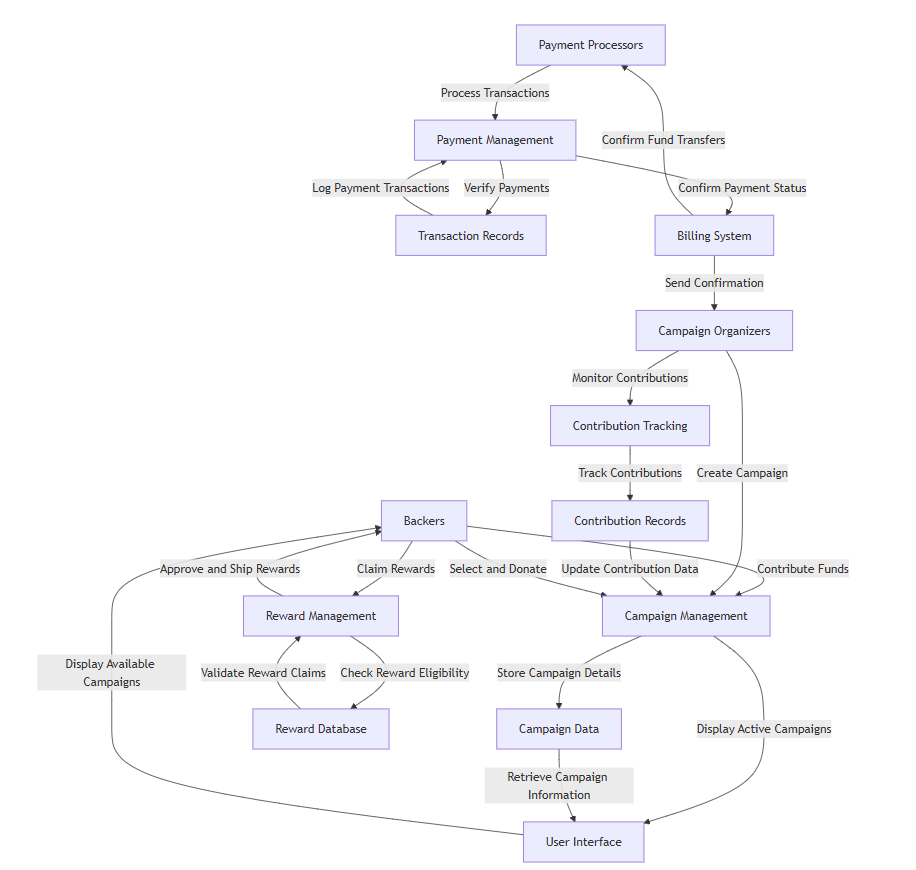

**1. External Entities**

- *Backers:* Contribute funds, track campaign progress, and claim rewards.

- *Campaign Organizers:* Create and manage campaigns, monitor contributions, and receive payouts.

- *Payment Processors:* Handle financial transactions, process payments, and confirm fund transfers.

**2. Processes**

- *Campaign Management:* Handles campaign creation, updating details, and tracking fundraising progress.

- *Contribution Tracking:* Monitors and records contributions made by backers.

- *Payment Management:* Verifies transactions, processes payments, and logs transactions.

- *Reward Management:* Ensures reward eligibility and processes reward claims.

- *Transaction Logging:* Maintains records of all payment transactions for auditing and verification.

**3. Data Flow and Interactions**

- Backers initiate a contribution which is processed by the Payment Management System.

- Contribution Tracking updates records and provides real-time fundraising data.

- Campaign Organizers monitor contributions and adjust campaign strategies accordingly.

- Payment Processors confirm fund transfers, ensuring transaction security and integrity.

- Upon successful contributions, Reward Management verifies eligibility and processes claims.

- The system maintains detailed Transaction Records for compliance and auditing.

**Insights from the DFD**

- The structured flow of data ensures seamless operations, avoiding bottlenecks in financial transactions and campaign management.

- Real-time updates in contribution tracking allow campaign organizers to make strategic decisions based on incoming funds.

- Integrated payment processing enhances security and transparency, ensuring proper fund allocation and distribution.

- Reward verification and claims are efficiently managed, providing backers with incentives and enhancing engagement.

- Clear entity interactions enable smooth operations between contributors, organizers, and payment systems.

## 8. Managerial Implications

A well-structured Crowdfunding Platform Management System provides significant advantages to campaign organizers, contributors, and financial teams:

**Impact on Campaign Management**

* *Improved Fundraising Efficiency:* Automated tracking of contributions and campaign progress reduces manual workload.

* *Better Resource Allocation:* Real-time data helps in making strategic decisions on marketing efforts and fund distribution.

* *Regulatory Compliance:* Ensures transparent financial tracking for audits and legal requirements.

* *Seamless Integration:* The system can be linked with external payment processors and marketing platforms for enhanced visibility.

**Impact on Contributors**

* *Enhanced Trust and Transparency:* Backers can track contributions, view campaign progress, and claim rewards seamlessly.

* *Optimized User Experience:* The platform provides a streamlined donation process with multiple payment methods.

* *Reward Management Efficiency:* Ensures backers receive timely rewards based on contribution tiers.

**Impact on Financial Management**

* *Accurate Transaction Tracking:* Ensures proper logging of payments, refunds, and financial transactions.

* *Budget Optimization:* Helps campaign organizers allocate resources effectively based on real-time insights.

* *Fraud Prevention:* Secure payment processing and transaction tracking minimize financial risks.

## 9. Conclusion

The **Crowdfunding Platform Management System** is a scalable, secure, and efficient platform designed to enhance the crowdfunding experience for both organizers and backers. By integrating real-time contribution tracking, automated payment processing, and structured reward management, the system optimizes resource allocation, ensures transparency, and improves financial decision-making. Its structured approach to data management, compliance, and seamless integration capabilities makes it a vital tool for efficient and successful crowdfunding campaigns.